# Импортирование необходимых библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# EDA

## Загрузка и обзор данных

In [5]:
data = pd.read_csv("data/kc_house_data.csv", parse_dates=["date"], index_col=0)
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [209]:
data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

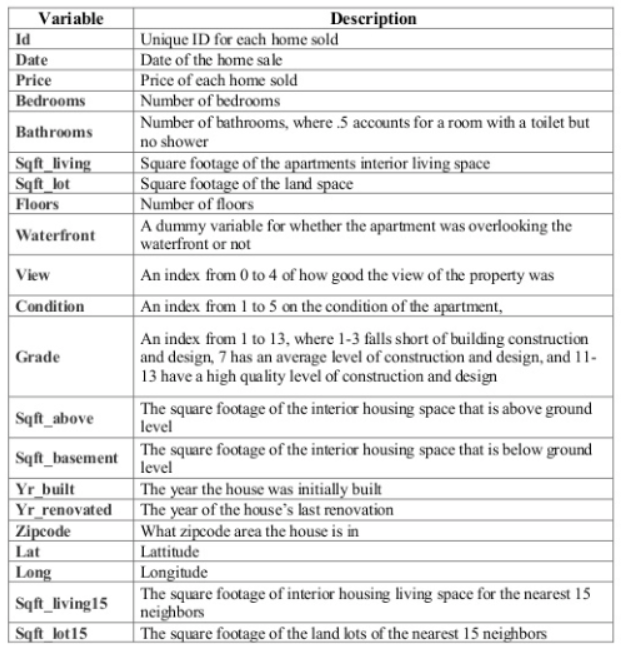

## Количественные характеристики датасета

In [210]:
data.shape

(21613, 20)

In [211]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21613 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21613 non-null  datetime64[ns]
 1   price          21613 non-null  float64       
 2   bedrooms       21613 non-null  int64         
 3   bathrooms      21613 non-null  float64       
 4   sqft_living    21613 non-null  int64         
 5   sqft_lot       21613 non-null  int64         
 6   floors         21613 non-null  float64       
 7   waterfront     21613 non-null  int64         
 8   view           21613 non-null  int64         
 9   condition      21613 non-null  int64         
 10  grade          21613 non-null  int64         
 11  sqft_above     21613 non-null  int64         
 12  sqft_basement  21613 non-null  int64         
 13  yr_built       21613 non-null  int64         
 14  yr_renovated   21613 non-null  int64         
 15  zipcode   

In [212]:
data.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Пропущенные значения в данных отсутствуют

In [213]:
data.describe()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,2014-10-29 04:38:01.959931648,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
min,2014-05-02 00:00:00,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2014-07-22 00:00:00,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,2014-10-16 00:00:00,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,2015-02-17 00:00:00,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,2015-05-27 00:00:00,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000
std,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631


## Визуализация

Выведем корреляционную матрицу

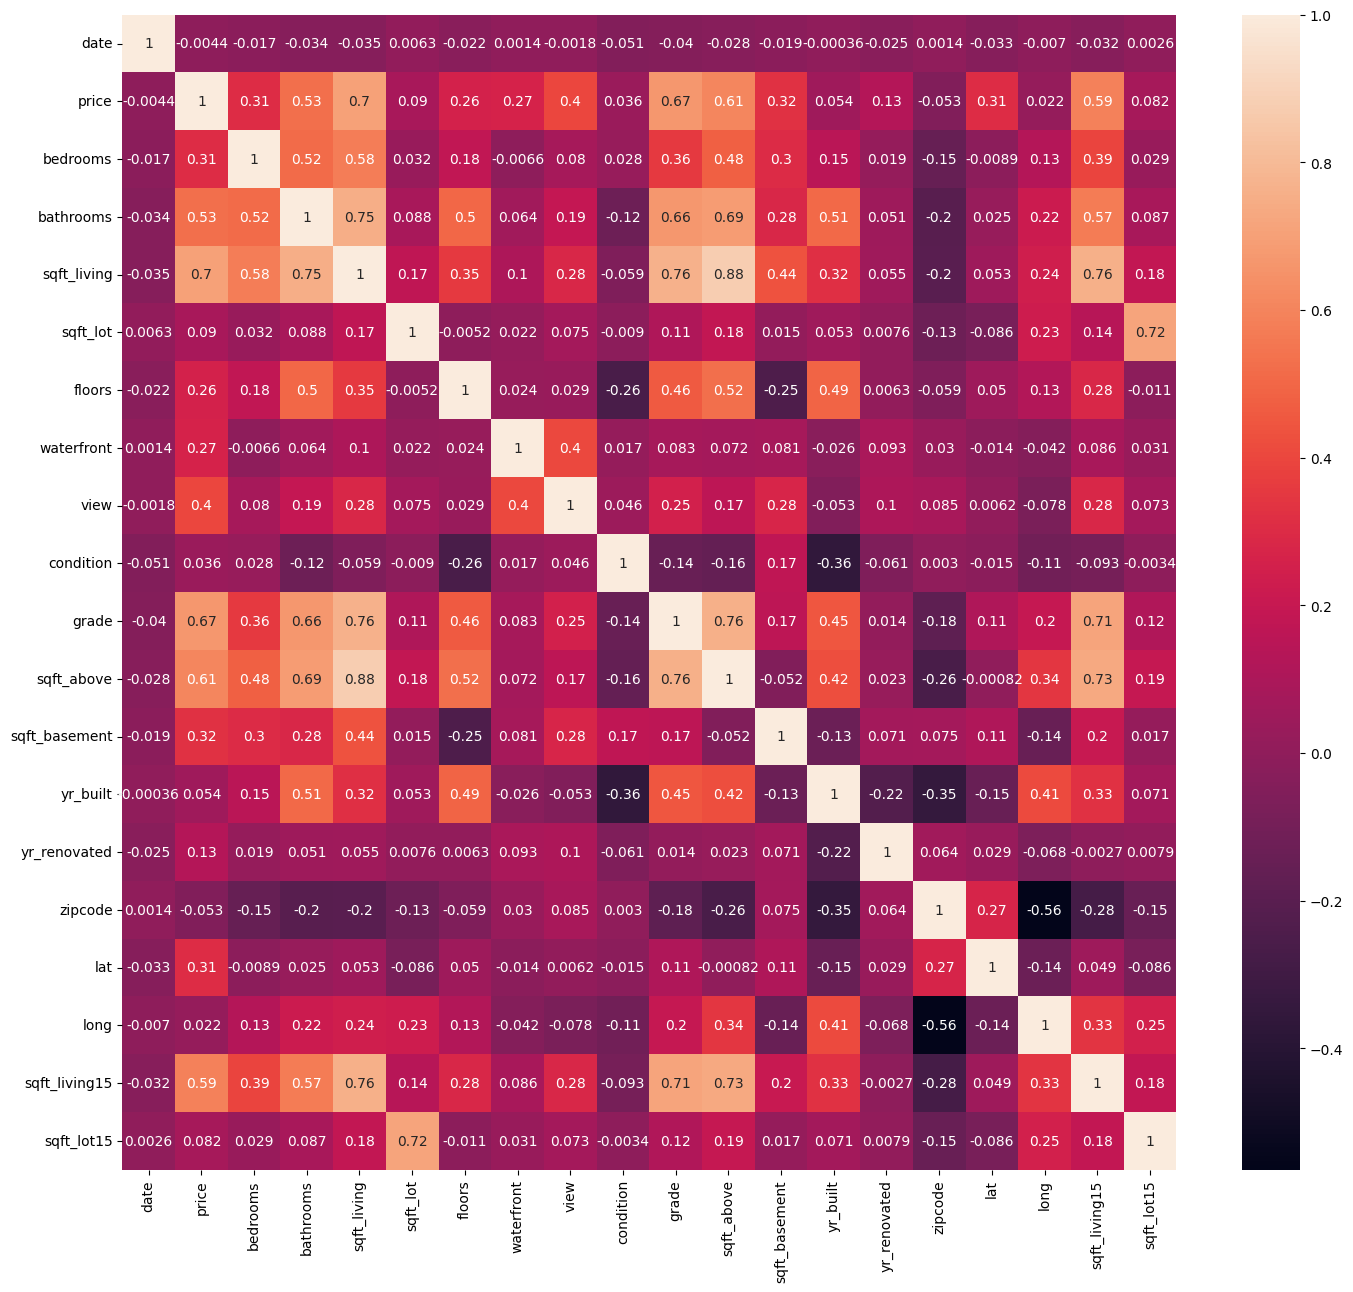

In [214]:
fig = plt.figure(figsize=(17, 15))
sns.heatmap(data.corr(), annot=True)
plt.show()
fig.savefig("fig")

Как видно из тепловой карты, целевая переменная «price» коррелирует со многими признаками. Некоторые признаки также сильно коррелируют между собой, что говорит о мультиколлинеарности

Рассмотрим распределения некоторых признаков с помощью коробчатых диаграмм и гистограмм

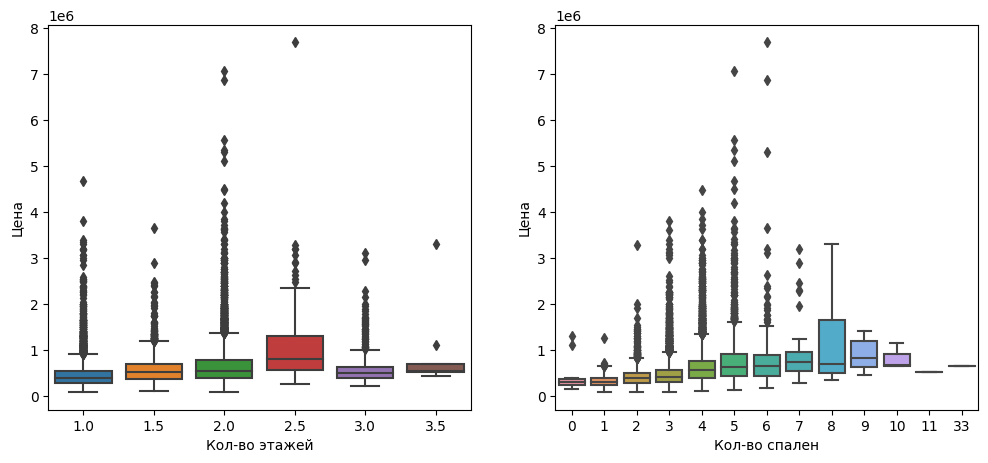

In [215]:
_, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(data=data, x="floors", y="price", ax=ax[0])
ax[0].set_xlabel("Кол-во этажей")
ax[0].set_ylabel("Цена")

sns.boxplot(data=data, x="bedrooms", y="price", ax=ax[1])
ax[1].set_xlabel("Кол-во спален")
ax[1].set_ylabel("Цена")

plt.show()

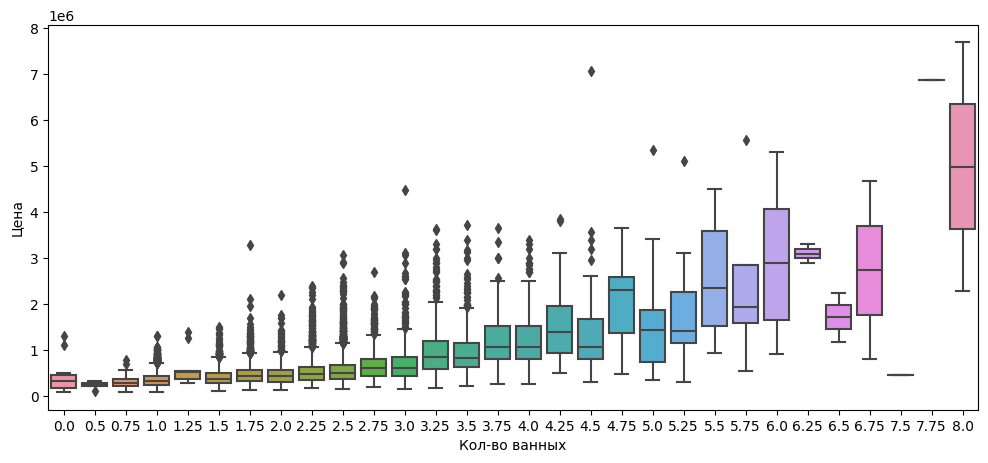

In [216]:
plt.figure(figsize=(12, 5))

sns.boxplot(data=data, x="bathrooms", y="price")

plt.xlabel("Кол-во ванных")
plt.ylabel("Цена")

plt.show()

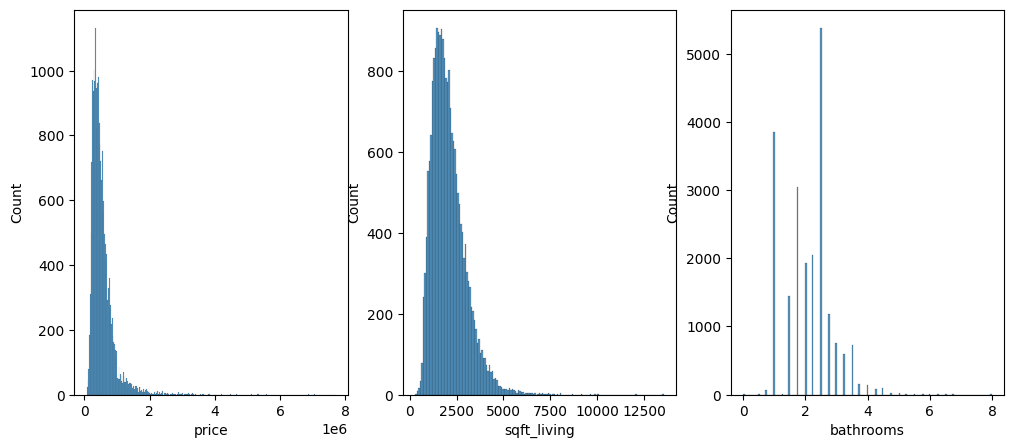

In [217]:
_, ax = plt.subplots(1, 3, figsize=(12, 5))

sns.histplot(data=data["price"], ax=ax[0])
sns.histplot(data=data["sqft_living"], ax=ax[1])
sns.histplot(data=data["bathrooms"], ax=ax[2])

plt.show()

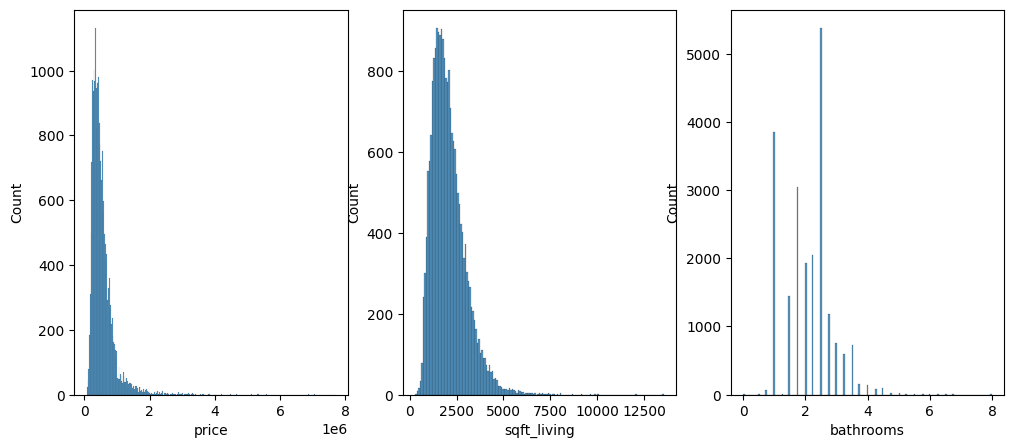

In [218]:
_, ax = plt.subplots(1, 3, figsize=(12, 5))

sns.histplot(data=data["price"], ax=ax[0])
sns.histplot(data=data["sqft_living"], ax=ax[1])
sns.histplot(data=data["bathrooms"], ax=ax[2])

plt.show()

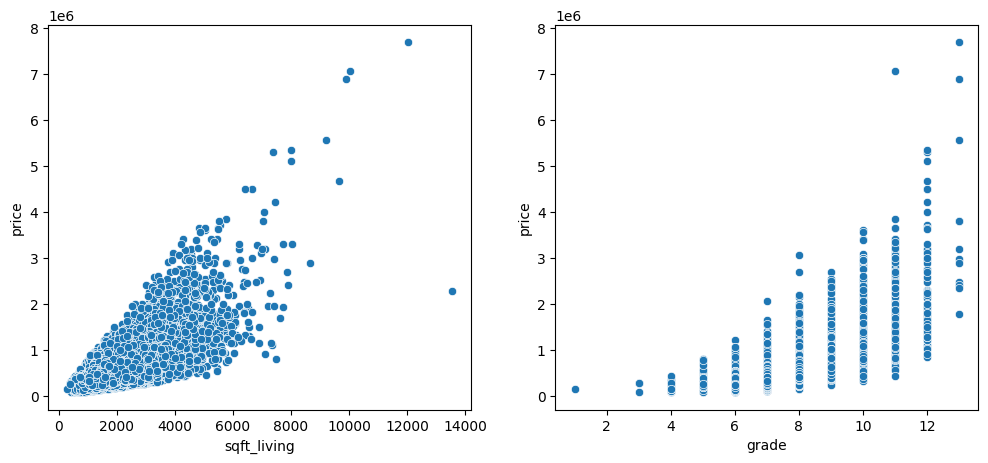

In [219]:
_, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.scatterplot(data=data, x="sqft_living", y="price", ax=ax[0])
sns.scatterplot(data=data, x="grade", y="price", ax=ax[1])

plt.show()

# Моделирование

In [6]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

Разбиение на тренировочную и тестовую выборку

In [146]:
from sklearn.model_selection import (
    train_test_split,
    cross_validate,
    cross_val_score,
    LearningCurveDisplay,
    ShuffleSplit,
    KFold,
)

In [147]:
X = data.drop(["date", "price"], axis=1)
y = data["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

В качестве бейзлайна используем простую линейную регрессию на исходных данных

In [9]:
def print_metrics(fitted_estimator, X_test, y_test):
    y_pred = fitted_estimator.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    print(f"R-squared: {r2}\nRMSE: {rmse}\nMAE: {mae}")

In [10]:
def print_metrics_cv(estimator, X_train, y_train, cv=10):
    cv = cross_validate(
        estimator,
        X_train,
        y_train,
        scoring=("r2", "neg_mean_squared_error", "neg_mean_absolute_error"),
        return_train_score=True,
        cv=cv,
    )

    time_mean = cv["fit_time"].mean()

    test_r2_mean = cv["test_r2"].mean()
    test_rmse_mean = np.sqrt(-cv["test_neg_mean_squared_error"].mean())
    test_mae_mean = -cv["test_neg_mean_absolute_error"].mean()

    train_r2_mean = cv["train_r2"].mean()
    train_rmse_mean = np.sqrt(-cv["train_neg_mean_squared_error"].mean())
    train_mae_mean = -cv["train_neg_mean_absolute_error"].mean()

    print(f"Среднее время обучения: {time_mean}")
    print(f"Train R-squared: {train_r2_mean}, test R-squared: {test_r2_mean}")
    print(f"Train RMSE: {train_rmse_mean}, test RMSE: {test_rmse_mean}")
    print(f"Train MAE: {train_mae_mean}, test MAE: {test_mae_mean}")

    return cv

## Линейная регрессия

In [8]:
from sklearn.linear_model import LinearRegression

In [224]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
print_metrics(lin_reg, X_test, y_test)

R-squared: 0.6949310095117858
RMSE: 190473.3755118472
MAE: 122187.77571870478


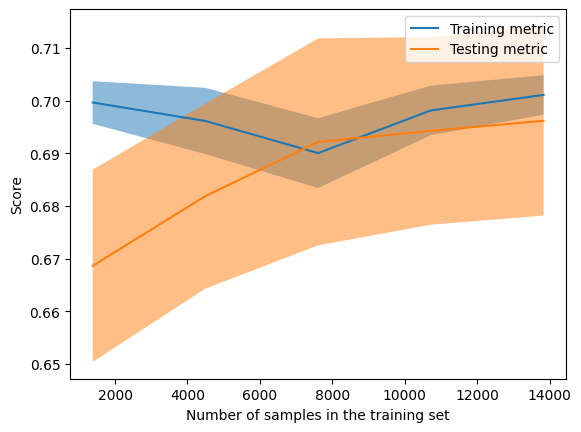

In [225]:
LearningCurveDisplay.from_estimator(lin_reg, X_train, y_train, cv=5, score_type="both")
plt.show()

## Линейная регрессия с регуляризацией

In [8]:
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV

In [10]:
scaler = StandardScaler()

In [250]:
lasso = LassoCV()
lasso_pipe = make_pipeline(scaler, lasso)
lasso_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('lassocv', LassoCV())])

In [266]:
lasso_pipe[1].alpha_

262.16484832491756

In [252]:
print_metrics(lasso_pipe, X_test, y_test)

R-squared: 0.6950729675634397
RMSE: 190429.0537741377
MAE: 122034.91381281483


In [264]:
ridge = RidgeCV()
ridge_pipe = make_pipeline(scaler, ridge)
ridge_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('ridgecv', RidgeCV())])

In [265]:
print_metrics(ridge_pipe, X_test, y_test)

R-squared: 0.6949359237935117
RMSE: 190471.84136116755
MAE: 122167.12306990857


In [259]:
elasticnet = ElasticNetCV()
elasticnet_pipe = make_pipeline(scaler, elasticnet)
elasticnet_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('elasticnetcv', ElasticNetCV())])

In [260]:
print_metrics(elasticnet_pipe, X_test, y_test)

R-squared: 0.018254518479091875
RMSE: 341691.9139007543
MAE: 228554.89760265034


## K-ближайших соседей

In [267]:
from sklearn.neighbors import KNeighborsRegressor

In [269]:
knn = KNeighborsRegressor(n_neighbors=5)
knn_cv = print_metrics_cv(knn, X_train, y_train)

Среднее время обучения: 0.005479574203491211
Train R-squared: 0.6833608112871196, test R-squared: 0.510145095843081
Train RMSE: 209546.54255199732, test RMSE: 259399.02154214648
Train MAE: 127852.10089839986, test MAE: 157993.03334875652


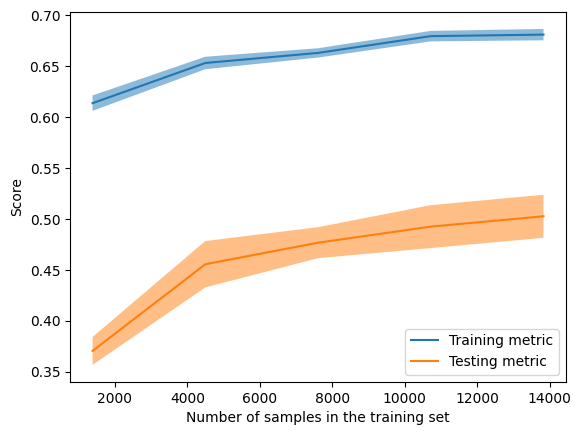

In [270]:
LearningCurveDisplay.from_estimator(knn, X_train, y_train, cv=5, score_type="both")
plt.show()

Text(0.5, 1.0, 'R^2 на обучающей и тестовой выборках')

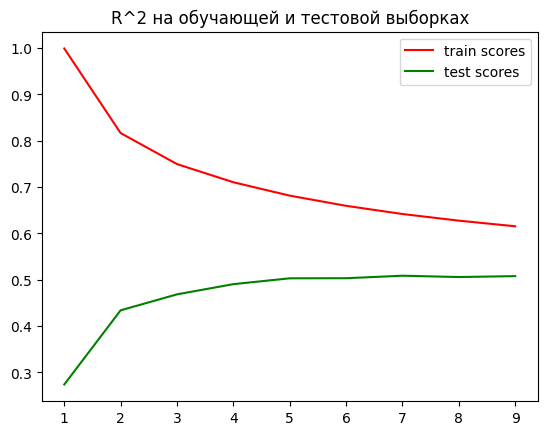

In [274]:
train_scores = []
test_scores = []
neighbors = [i for i in range(1, 10)]

for n in neighbors:
    reg = KNeighborsRegressor(n)
    cv = cross_validate(reg, X_train, y_train, return_train_score=True)
    train_scores.append(cv["train_score"].mean())
    test_scores.append(cv["test_score"].mean())


plt.plot(neighbors, train_scores, "r", label="train scores")
plt.plot(neighbors, test_scores, "g", label="test scores")
plt.legend()
plt.title("R^2 на обучающей и тестовой выборках")
plt.show()

In [276]:
# knn с нормализацией

knn = KNeighborsRegressor(n_neighbors=5)
knn_pipe = make_pipeline(scaler, knn)
knn_cv = print_metrics_cv(knn_pipe, X_train, y_train)

Среднее время обучения: 0.01928269863128662
Train R-squared: 0.8640427736316486, test R-squared: 0.796342657953495
Train RMSE: 137317.5533762808, test RMSE: 168414.49856053322
Train MAE: 73124.50964590964, test MAE: 90164.53510699826


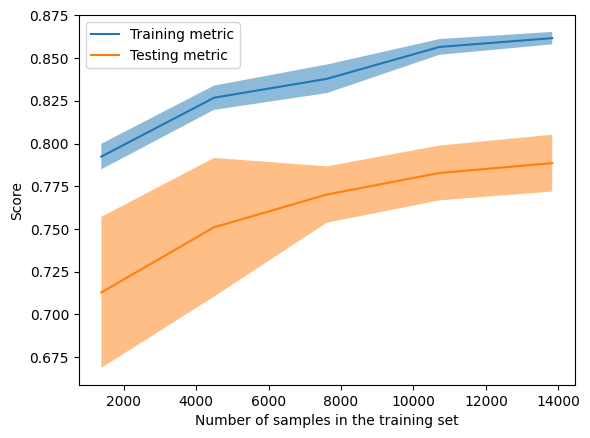

In [278]:
LearningCurveDisplay.from_estimator(knn_pipe, X_train, y_train, cv=5, score_type="both")
plt.show()

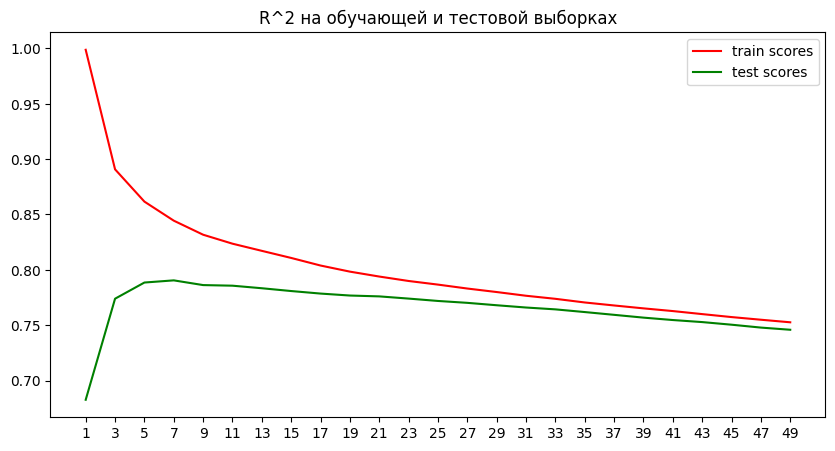

In [279]:
train_scores = []
test_scores = []
neighbors = [i for i in range(1, 50, 2)]

for n in neighbors:
    knn = KNeighborsRegressor(n)
    reg_pipe = make_pipeline(scaler, knn)
    cv = cross_validate(reg_pipe, X_train, y_train, return_train_score=True)
    train_scores.append(cv["train_score"].mean())
    test_scores.append(cv["test_score"].mean())

plt.figure(figsize=(10, 5))
plt.plot(neighbors, train_scores, "r", label="train scores")
plt.plot(neighbors, test_scores, "g", label="test scores")
plt.legend()
plt.title("R^2 на обучающей и тестовой выборках")
plt.xticks(neighbors)
plt.show()

In [11]:
from sklearn.model_selection import GridSearchCV

In [283]:
knn = KNeighborsRegressor()
param_grid = {"kneighborsregressor__n_neighbors": [i for i in range(1, 40)]}
knn_pipe = make_pipeline(scaler, knn)
gs = GridSearchCV(knn_pipe, param_grid, cv=10)
gs.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('kneighborsregressor',
                                        KNeighborsRegressor())]),
             param_grid={'kneighborsregressor__n_neighbors': [1, 2, 3, 4, 5, 6,
                                                              7, 8, 9, 10, 11,
                                                              12, 13, 14, 15,
                                                              16, 17, 18, 19,
                                                              20, 21, 22, 23,
                                                              24, 25, 26, 27,
                                                              28, 29, 30, ...]})

In [284]:
gs.best_params_

{'kneighborsregressor__n_neighbors': 7}

In [287]:
pd.DataFrame(gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kneighborsregressor__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.019053,0.003583,0.053070,0.017672,1,{'kneighborsregressor__n_neighbors': 1},0.748838,0.717927,0.692071,0.575593,0.736018,0.617902,0.722076,0.710761,0.687818,0.697583,0.690659,0.051155,39
1,0.020499,0.004052,0.054567,0.018516,2,{'kneighborsregressor__n_neighbors': 2},0.789779,0.813748,0.760564,0.719184,0.779243,0.695196,0.800378,0.735574,0.731045,0.768464,0.759318,0.036255,38
2,0.014800,0.002101,0.040099,0.004117,3,{'kneighborsregressor__n_neighbors': 3},0.776217,0.792493,0.763976,0.746786,0.799737,0.755296,0.815276,0.799550,0.767871,0.798450,0.781565,0.021494,18
3,0.014710,0.002732,0.045062,0.010959,4,{'kneighborsregressor__n_neighbors': 4},0.788601,0.785902,0.787843,0.766810,0.809316,0.773745,0.812881,0.809786,0.789051,0.814813,0.793875,0.016062,5
4,0.014031,0.004770,0.050290,0.009770,5,{'kneighborsregressor__n_neighbors': 5},0.786368,0.787864,0.798994,0.765865,0.814971,0.775085,0.804994,0.819091,0.795607,0.814587,0.796343,0.016828,3
5,0.015148,0.001597,0.062476,0.003276,6,{'kneighborsregressor__n_neighbors': 6},0.789389,0.773578,0.798423,0.771443,0.809812,0.778172,0.805863,0.831836,0.794314,0.815579,0.796841,0.018506,2
6,0.016720,0.002749,0.057500,0.008210,7,{'kneighborsregressor__n_neighbors': 7},0.778574,0.780099,0.795229,0.766561,0.819198,0.796401,0.812004,0.827082,0.788862,0.819112,0.798312,0.019277,1
7,0.015518,0.000666,0.048153,0.005343,8,{'kneighborsregressor__n_neighbors': 8},0.775779,0.776718,0.790250,0.769891,0.815101,0.791717,0.814240,0.819582,0.789415,0.814642,0.795733,0.017770,4
8,0.015006,0.002479,0.045257,0.004139,9,{'kneighborsregressor__n_neighbors': 9},0.768160,0.768471,0.789319,0.769046,0.809835,0.788115,0.814652,0.817786,0.788569,0.819320,0.793327,0.019768,6
9,0.013722,0.003707,0.045154,0.003243,10,{'kneighborsregressor__n_neighbors': 10},0.768979,0.762505,0.789856,0.770088,0.804490,0.779881,0.810484,0.820891,0.785917,0.817576,0.791067,0.020115,8


In [289]:
knn = KNeighborsRegressor(n_neighbors=7)
knn_pipe = make_pipeline(scaler, knn)
knn_cv = print_metrics_cv(knn_pipe, X_train, y_train)

Среднее время обучения: 0.01881418228149414
Train R-squared: 0.8474240137046343, test R-squared: 0.7983121091345563
Train RMSE: 145468.20554083298, test RMSE: 167672.943389812
Train MAE: 76864.74326108312, test MAE: 89175.56091051803


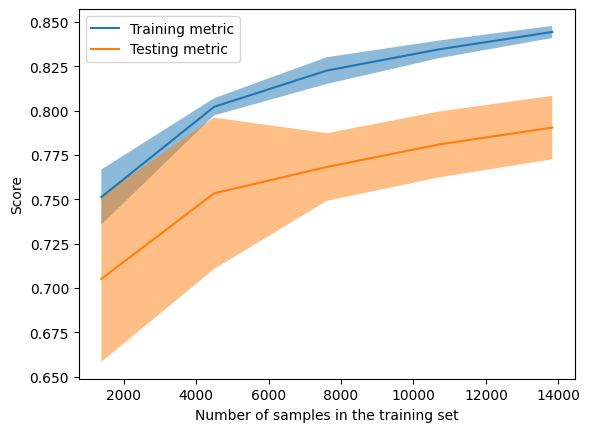

In [290]:
LearningCurveDisplay.from_estimator(knn_pipe, X_train, y_train, cv=5, score_type="both")
plt.show()

In [293]:
knn_test = KNeighborsRegressor(n_neighbors=7)
knn_testpipe = make_pipeline(scaler, knn_test)
knn_testpipe.fit(X_train, y_train)
print_metrics(knn_testpipe, X_test, y_test)

R-squared: 0.7921328367903903
RMSE: 157227.38468686063
MAE: 85732.49644757278


## Деревья решений

In [12]:
from sklearn.tree import DecisionTreeRegressor

In [295]:
tree = DecisionTreeRegressor(random_state=42)
tree_cv = print_metrics_cv(tree, X_train, y_train)

Среднее время обучения: 0.2906643390655518
Train R-squared: 0.9993267951791092, test R-squared: 0.7360303553618277
Train RMSE: 9658.750857103472, test RMSE: 191020.17423116122
Train MAE: 877.8978407557355, test MAE: 102027.94138230191


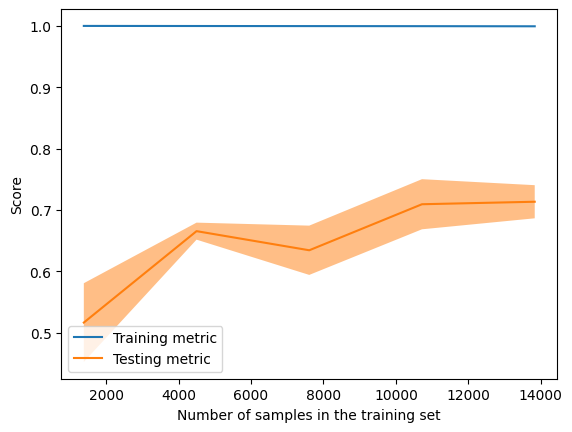

In [296]:
LearningCurveDisplay.from_estimator(tree, X_train, y_train, cv=5, score_type="both")
plt.show()

In [309]:
param_grid = {
    "splitter": ["best", "random"],
    "max_depth": [1, 3, 5, 7, 9, 11, 12],
    "min_samples_leaf": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "max_leaf_nodes": [None, 10, 20, 30, 40, 50, 60, 70, 80, 90],
}

In [310]:
tree = DecisionTreeRegressor(random_state=42)
gs_tree = GridSearchCV(tree, param_grid, cv=3)
gs_tree.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 12],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70,
                                            80, 90],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'splitter': ['best', 'random']})

In [311]:
pd.DataFrame(gs_tree.cv_results_).sort_values("mean_test_score", ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
1210,0.097426,0.007080,0.002609,0.000277,12,None,6,best,"{'max_depth': 12, 'max_leaf_nodes': None, 'min...",0.801026,0.778147,0.778232,0.785802,0.010765,1
1010,0.073644,0.010589,0.005624,0.004719,11,None,6,best,"{'max_depth': 11, 'max_leaf_nodes': None, 'min...",0.802918,0.777114,0.776997,0.785676,0.012192,2
1212,0.084943,0.007506,0.002420,0.000314,12,None,7,best,"{'max_depth': 12, 'max_leaf_nodes': None, 'min...",0.795753,0.786823,0.767064,0.783214,0.011987,3
1012,0.069004,0.007310,0.002031,0.001473,11,None,7,best,"{'max_depth': 11, 'max_leaf_nodes': None, 'min...",0.795259,0.786494,0.767513,0.783089,0.011580,4
1008,0.076290,0.000219,0.000000,0.000000,11,None,5,best,"{'max_depth': 11, 'max_leaf_nodes': None, 'min...",0.795106,0.775497,0.776455,0.782353,0.009026,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,0.004262,0.000283,0.001172,0.000624,1,20,9,random,"{'max_depth': 1, 'max_leaf_nodes': 20, 'min_sa...",0.183500,0.215755,0.175633,0.191629,0.017359,1301
171,0.003687,0.000499,0.001417,0.000299,1,80,6,random,"{'max_depth': 1, 'max_leaf_nodes': 80, 'min_sa...",0.183500,0.215755,0.175633,0.191629,0.017359,1301
69,0.003907,0.000706,0.001322,0.000454,1,30,5,random,"{'max_depth': 1, 'max_leaf_nodes': 30, 'min_sa...",0.183500,0.215755,0.175633,0.191629,0.017359,1301
173,0.003744,0.000619,0.001345,0.000467,1,80,7,random,"{'max_depth': 1, 'max_leaf_nodes': 80, 'min_sa...",0.183500,0.215755,0.175633,0.191629,0.017359,1301


In [312]:
params = gs_tree.best_params_
params

{'max_depth': 12,
 'max_leaf_nodes': None,
 'min_samples_leaf': 6,
 'splitter': 'best'}

In [322]:
tree = DecisionTreeRegressor(random_state=42, **params)
tree_cv = print_metrics_cv(tree, X_train, y_train)

Среднее время обучения: 0.10579345226287842
Train R-squared: 0.9059331049106675, test R-squared: 0.776630340125878
Train RMSE: 114258.19589678856, test RMSE: 174852.76218233397
Train MAE: 64790.25905892259, test MAE: 89995.50911124455


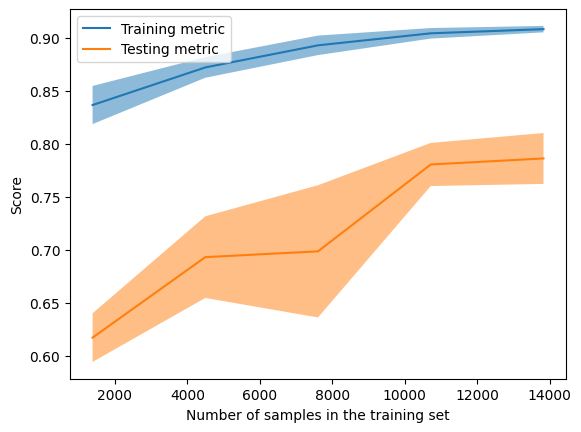

In [323]:
LearningCurveDisplay.from_estimator(tree, X_train, y_train, cv=5, score_type="both")
plt.show()

In [324]:
tree_test = DecisionTreeRegressor(random_state=42, **params)
tree_test.fit(X_train, y_train)
print_metrics(tree_test, X_test, y_test)

R-squared: 0.8183091457100213
RMSE: 146994.73488638827
MAE: 81533.09508953954


## Ансамбли

### Bagging

In [13]:
from sklearn.ensemble import (
    BaggingRegressor,
    RandomForestRegressor,
    ExtraTreesRegressor,
)

In [326]:
bagging = BaggingRegressor(
    DecisionTreeRegressor(random_state=42),
    n_estimators=10,
    random_state=42,
)
bagging_cv = print_metrics_cv(bagging, X_train, y_train)

Среднее время обучения: 1.2572350025177002
Train R-squared: 0.9738265740043272, test R-squared: 0.8512335838699222
Train RMSE: 60255.59839983605, test RMSE: 143133.56856201598
Train MAE: 30281.64050284135, test MAE: 74578.30184068688


In [330]:
bagging = BaggingRegressor(
    DecisionTreeRegressor(random_state=42),
    n_estimators=100,
    random_state=42,
)
bagging_cv = print_metrics_cv(bagging, X_train, y_train)

Среднее время обучения: 12.46764316558838
Train R-squared: 0.9817202115788624, test R-squared: 0.8663196737778902
Train RMSE: 50352.61239094825, test RMSE: 135967.08226937157
Train MAE: 26468.44174331027, test MAE: 70622.48509933488


In [328]:
bagging = BaggingRegressor(
    DecisionTreeRegressor(random_state=42),
    n_estimators=200,
    random_state=42,
)
bagging_cv = print_metrics_cv(bagging, X_train, y_train)

Среднее время обучения: 24.96097273826599
Train R-squared: 0.9821018799397041, test R-squared: 0.8666781162481275
Train RMSE: 49826.68858750941, test RMSE: 135815.94995671202
Train MAE: 26213.927203851967, test MAE: 70350.39704642582


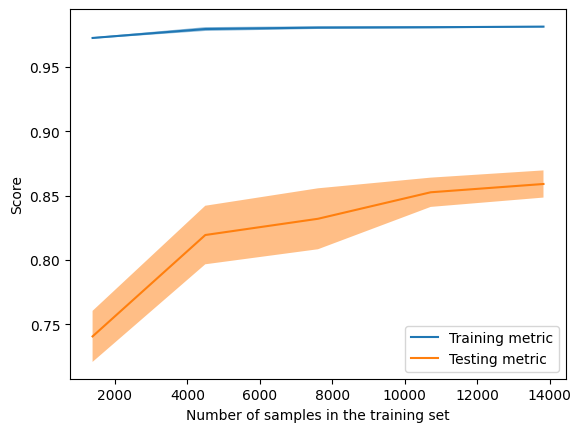

In [331]:
LearningCurveDisplay.from_estimator(bagging, X_train, y_train, score_type="both", cv=5)
plt.show()

In [333]:
extra_tree = ExtraTreesRegressor()
extra_tree_cv = print_metrics_cv(extra_tree, X_train, y_train)

Среднее время обучения: 4.395413565635681
Train R-squared: 0.9993267874653977, test R-squared: 0.8726735364781257
Train RMSE: 9658.805838399294, test RMSE: 133006.20163529483
Train MAE: 878.5686845318423, test MAE: 70477.27601069983


In [335]:
random_forest = RandomForestRegressor(500)
rf_cv = print_metrics_cv(random_forest, X_train, y_train)

Среднее время обучения: 61.57852129936218
Train R-squared: 0.982412019014874, test R-squared: 0.8686977023416308
Train RMSE: 49394.96241980175, test RMSE: 134792.48354066958
Train MAE: 26089.205902952865, test MAE: 70142.73557567403


Подбор гиперпараметров для RandomForest

In [9]:
from sklearn.model_selection import RandomizedSearchCV

In [338]:
n_estimators = [int(x) for x in np.linspace(start=100, stop=500, num=5)]
max_features = [1.0, "sqrt"]
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {
    "n_estimators": n_estimators,
    "max_features": max_features,
    "max_depth": max_depth,
    "min_samples_split": min_samples_split,
    "min_samples_leaf": min_samples_leaf,
    "bootstrap": bootstrap,
}

random_grid

{'n_estimators': [100, 200, 300, 400, 500],
 'max_features': [1.0, 'sqrt'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}

In [344]:
rf_random = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=random_grid,
    cv=5,
    random_state=42,
)

rf_random.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': [1.0, 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42)

In [345]:
pd.DataFrame(rf_random.cv_results_).sort_values(by="mean_test_score", ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
6,15.329470,0.021647,0.299570,0.006449,400,5,2,sqrt,20,False,"{'n_estimators': 400, 'min_samples_split': 5, ...",0.838032,0.855016,0.852505,0.876737,0.872951,0.859048,0.014191,1
5,23.987050,0.108203,0.146672,0.001430,200,2,2,1.0,60,True,"{'n_estimators': 200, 'min_samples_split': 2, ...",0.845578,0.847872,0.852840,0.871953,0.865471,0.856743,0.010258,2
9,3.964030,0.009209,0.079708,0.001756,100,5,2,sqrt,None,False,"{'n_estimators': 100, 'min_samples_split': 5, ...",0.835479,0.850874,0.848697,0.875029,0.870555,0.856127,0.014660,3
0,3.901548,0.608903,0.081807,0.012096,100,5,1,sqrt,100,True,"{'n_estimators': 100, 'min_samples_split': 5, ...",0.827619,0.848818,0.845137,0.875958,0.870342,0.853575,0.017605,4
7,3.181813,0.008054,0.074705,0.002326,100,2,2,sqrt,40,True,"{'n_estimators': 100, 'min_samples_split': 2, ...",0.825489,0.846333,0.850070,0.873808,0.867842,0.852709,0.017104,5
2,2.347552,0.009499,0.039738,0.003306,100,5,1,sqrt,10,False,"{'n_estimators': 100, 'min_samples_split': 5, ...",0.819509,0.834136,0.826035,0.856685,0.848576,0.836988,0.013826,6
8,39.997234,0.309274,0.163807,0.003369,300,10,4,1.0,50,False,"{'n_estimators': 300, 'min_samples_split': 10,...",0.799159,0.741342,0.735085,0.788830,0.786505,0.770184,0.026523,7
3,9.629996,0.025044,0.034753,0.002981,100,2,2,1.0,10,False,"{'n_estimators': 100, 'min_samples_split': 2, ...",0.772057,0.745809,0.739390,0.788843,0.774068,0.764033,0.018547,8
1,67.936467,0.430043,0.294739,0.002470,500,2,4,1.0,30,False,"{'n_estimators': 500, 'min_samples_split': 2, ...",0.784964,0.737692,0.728044,0.763186,0.789941,0.760765,0.024681,9
4,61.556897,0.463545,0.310296,0.002439,400,2,2,1.0,70,False,"{'n_estimators': 400, 'min_samples_split': 2, ...",0.768806,0.726872,0.726012,0.764791,0.749436,0.747183,0.018130,10


In [347]:
params = rf_random.best_params_
params

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': False}

In [348]:
random_forest = RandomForestRegressor(random_state=42, **params)
rf_cv = print_metrics_cv(random_forest, X_train, y_train)

Среднее время обучения: 18.27033989429474
Train R-squared: 0.9882481000271621, test R-squared: 0.8656048950667452
Train RMSE: 40373.394682466045, test RMSE: 137328.42461342528
Train MAE: 21492.08836901128, test MAE: 71352.88516562583


In [350]:
models = [
    (
        "Bagging Trees",
        BaggingRegressor(
            DecisionTreeRegressor(random_state=42),
            n_estimators=100,
            random_state=42,
        ),
    ),
    (
        "Extra Trees",
        ExtraTreesRegressor(random_state=42),
    ),
    ("Random Forest", RandomForestRegressor(n_estimators=500, random_state=42)),
]

In [351]:
r2_res = []
names = []
for name, model in models:
    cv = cross_val_score(
        model,
        X_train,
        y_train,
        scoring="r2",
    )
    r2_res.append(cv)
    names.append(name)
    print(f"{name}: mean: {cv.mean()} std: {cv.std()}")

Bagging Trees: mean: 0.859153531343144 std: 0.010560965748263061
Extra Trees: mean: 0.8616764208782641 std: 0.01389318866158259
Random Forest: mean: 0.8596178498316034 std: 0.010680247943612251


In [352]:
rmse_res = []
names = []
for name, model in models:
    cv = cross_val_score(
        model,
        X_train,
        y_train,
        scoring="neg_mean_squared_error",
    )
    sq = np.sqrt(-cv)
    rmse_res.append(sq)
    names.append(name)
    print(f"{name}: mean: {sq.mean()} std: {sq.std()}")

Bagging Trees: mean: 139378.08315444976 std: 15764.324746068294
Extra Trees: mean: 138179.53543171874 std: 17438.25773363737
Random Forest: mean: 139107.3961013454 std: 15363.782944025741


In [353]:
mae_res = []
names = []
for name, model in models:
    cv = cross_val_score(
        model,
        X_train,
        y_train,
        scoring="neg_mean_absolute_error",
    )
    sq = -cv
    mae_res.append(sq)
    names.append(name)
    print(f"{name}: mean: {sq.mean()} std: {sq.std()}")

Bagging Trees: mean: 71448.9798233248 std: 2560.750289908934
Extra Trees: mean: 71469.35735367263 std: 1852.2332310325594
Random Forest: mean: 71024.55757122293 std: 2472.761189945487


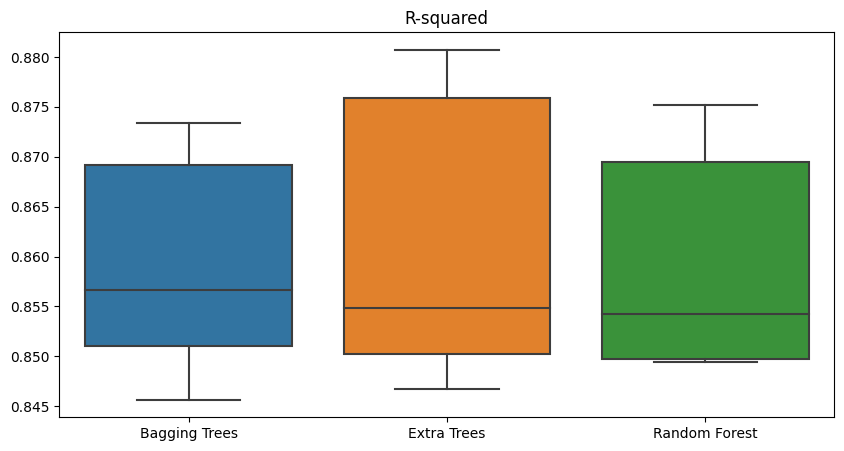

In [354]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
sns.boxplot(r2_res)
ax.set_xticklabels(names)
ax.set_title("R-squared")
plt.show()

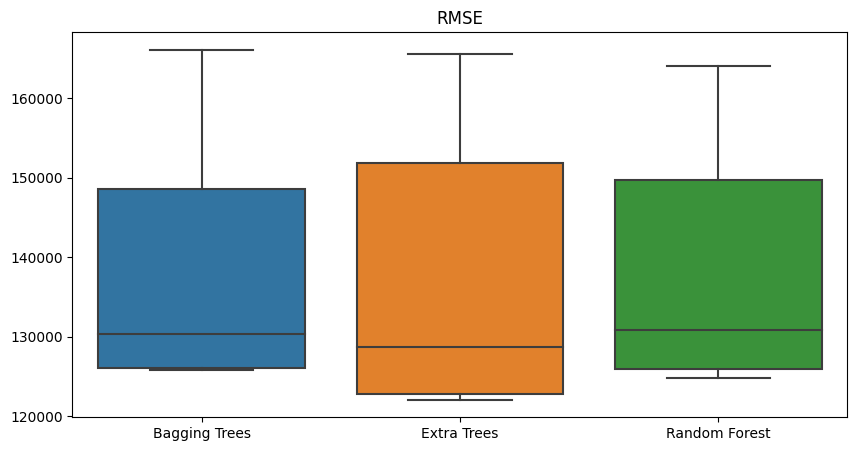

In [355]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
sns.boxplot(rmse_res)
ax.set_xticklabels(names)
ax.set_title("RMSE")
plt.show()

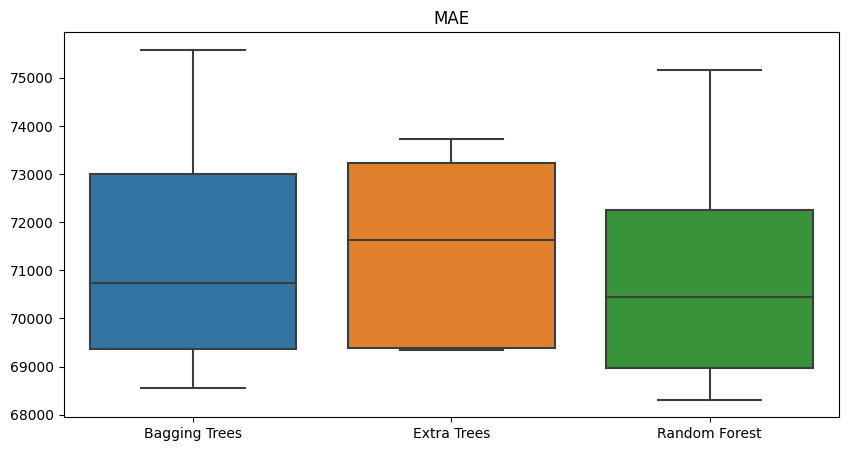

In [356]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
sns.boxplot(mae_res)
ax.set_xticklabels(names)
ax.set_title("MAE")
plt.show()

In [373]:
def format_dataframe(df):
    df[
        ["test_neg_mean_squared_error", "train_neg_mean_squared_error"]
    ] = np.sqrt(
        -df[
            ["test_neg_mean_squared_error", "train_neg_mean_squared_error"]
        ]
    )

    df[
        ["test_neg_mean_absolute_error", "train_neg_mean_absolute_error"]
    ] = -df[
        ["test_neg_mean_absolute_error", "train_neg_mean_absolute_error"]
    ]

    df.rename(
        columns={
            "test_neg_mean_absolute_error": "Test MAE",
            "train_neg_mean_absolute_error": "Train MAE",
            "test_neg_mean_squared_error": "Test RMSE",
            "train_neg_mean_squared_error": "Train RMSE",
            "test_r2": "Test R-squared",
            "train_r2": "Train R-squared",
            "fit_time": "Fit time",
            "score_time": "Score time",
        },
        inplace=True,
    )
    
    return df

In [374]:
random_forest_data = pd.DataFrame(rf_cv)

new_rf_data = format_dataframe(random_forest_data)

new_rf_data

,Fit time,Score time,Test R-squared,Train R-squared,Test RMSE,Train RMSE,Test MAE,Train MAE
0,20.245033,0.725775,0.880102,0.987528,140674.556341,41145.877456,74027.896131,21591.561847
1,17.994251,0.190672,0.825168,0.988523,183449.080085,39026.355711,72955.937897,21303.841929
2,17.986229,0.193587,0.863559,0.988244,128822.576277,40654.525210,70333.255178,21545.388116
3,17.821889,0.194057,0.853110,0.988383,125029.976948,40655.805323,71089.955516,21513.591787
4,18.784868,0.191734,0.873466,0.987817,131352.134912,41146.651312,72063.306943,21562.704726
5,18.125479,0.196218,0.855151,0.988725,157589.040988,39021.536333,76978.279260,21280.043790
6,17.601272,0.197694,0.874032,0.988370,123018.687294,40454.058049,67947.890764,21527.384759
7,18.013596,0.180159,0.880098,0.987991,124513.074353,40965.184170,70267.549349,21514.603756
8,18.166085,0.185604,0.874111,0.988449,131420.770410,40050.750630,71634.679706,21433.101857
9,17.964697,0.190459,0.877251,0.988451,113684.228453,40545.263829,66230.100911,21648.661122


In [377]:
bagging_data = format_dataframe(pd.DataFrame(bagging_cv))

bagging_data

,Fit time,Score time,Test R-squared,Train R-squared,Test RMSE,Train RMSE,Test MAE,Train MAE
0,12.510004,0.053516,0.887919,0.981246,136011.018373,50455.031021,72262.590330,26484.287154
1,12.291739,0.054080,0.852206,0.981820,168668.281480,49117.530421,71120.363087,26411.218515
2,12.440382,0.054142,0.842533,0.981829,138393.270688,50543.542301,71080.186962,26650.313280
3,12.417657,0.053754,0.864940,0.982010,119889.573676,50593.844565,69122.292372,26416.401739
4,12.469135,0.054441,0.860790,0.981953,137774.374697,50079.070088,73113.032103,26358.972989
5,12.533341,0.052878,0.864705,0.982233,152303.122169,48984.710254,76853.153895,26107.960821
6,12.598543,0.053570,0.873085,0.981084,123480.465278,51593.517085,67901.632217,26644.323757
7,12.431652,0.054773,0.877164,0.981938,126027.601466,50238.660419,69251.255330,26325.776802
8,12.526259,0.054019,0.884118,0.981018,126088.997153,51340.554456,69712.623898,26651.297211
9,12.457720,0.054450,0.855736,0.982071,123245.465958,50518.762677,65807.720798,26633.865164


In [378]:
extratrees_data = format_dataframe(pd.DataFrame(extra_tree_cv))

extratrees_data

,Fit time,Score time,Test R-squared,Train R-squared,Test RMSE,Train RMSE,Test MAE,Train MAE
0,4.438016,0.058581,0.884384,0.999251,138139.440178,10083.701396,73461.386917,935.191633
1,4.415766,0.058263,0.863334,0.999326,162194.454197,9457.605176,71211.006836,850.156352
2,4.399703,0.057944,0.870823,0.999255,125346.826769,10234.178829,69080.010957,966.707217
3,4.388107,0.057610,0.852603,0.999377,125245.429491,9413.346848,71150.193331,837.515584
4,4.381325,0.059520,0.886911,0.999336,124177.533287,9604.165321,70654.961628,861.465973
5,4.354310,0.057579,0.851683,0.999261,159464.370891,9987.233811,75004.040405,921.502281
6,4.397159,0.057516,0.885565,0.999364,117252.374101,9460.049808,67167.112898,836.735814
7,4.404690,0.057699,0.874431,0.999387,127421.997803,9254.141947,70090.118759,838.672386
8,4.422407,0.058063,0.884028,0.999336,126138.135061,9600.798404,70142.603213,892.398303
9,4.352654,0.057411,0.872974,0.999374,115647.944252,9442.277867,66811.325162,845.341302


In [380]:
print(f"Bagging Trees:\n{bagging_data.mean()}")

Bagging Trees:
Fit time               12.467643
Score time              0.053962
Test R-squared          0.866320
Train R-squared         0.981720
Test RMSE          135188.217094
Train RMSE          50346.522329
Test MAE            70622.485099
Train MAE           26468.441743
dtype: float64


In [381]:
print(f"Bagging Trees:\n{extratrees_data.mean()}")

Bagging Trees:
Fit time                4.395414
Score time              0.058019
Test R-squared          0.872674
Train R-squared         0.999327
Test RMSE          132102.850603
Train RMSE           9653.749941
Test MAE            70477.276011
Train MAE             878.568685
dtype: float64


In [375]:
print(f"Random Forest:\n{new_rf_data.mean()}")

Random Forest:
Fit time               18.270340
Score time              0.244596
Test R-squared          0.865605
Train R-squared         0.988248
Test RMSE          135955.412606
Train RMSE          40366.600802
Test MAE            71352.885166
Train MAE           21492.088369
dtype: float64


In [390]:
compare_table = pd.concat(
    [
        bagging_data.mean().rename("Bagging Trees"),
        extratrees_data.mean().rename("Extra Trees"),
        new_rf_data.mean().rename("Random Forest"),
    ],
    axis=1,
)

compare_table

,Bagging Trees,Extra Trees,Random Forest
Fit time,12.467643,4.395414,18.270340
Score time,0.053962,0.058019,0.244596
Test R-squared,0.866320,0.872674,0.865605
Train R-squared,0.981720,0.999327,0.988248
Test RMSE,135188.217094,132102.850603,135955.412606
Train RMSE,50346.522329,9653.749941,40366.600802
Test MAE,70622.485099,70477.276011,71352.885166
Train MAE,26468.441743,878.568685,21492.088369


In [393]:
extratrees_test = ExtraTreesRegressor()
extratrees_test.fit(X_train, y_train)
print_metrics(extratrees_test, X_test, y_test)

R-squared: 0.893164016549025
RMSE: 112718.19403492965
MAE: 64791.74109877401


### Boosting

In [15]:
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor

In [14]:
adaboost = AdaBoostRegressor()
ada_cv = print_metrics_cv(adaboost, X_train, y_train)

Среднее время обучения: 1.5605647802352904
Train R-squared: 0.25479496491271875, test R-squared: 0.1797712495282573
Train RMSE: 321464.7301038399, test RMSE: 332493.1375317405
Train MAE: 290683.56978267955, test MAE: 293189.68388668157


In [74]:
cv_object = KFold(n_splits=10, shuffle=True, random_state=42)

In [8]:
import catboost

In [109]:
cat_reg = catboost.CatBoostRegressor(verbose=False, random_seed=42)
cat_cv = print_metrics_cv(cat_reg, X_train, y_train, cv=cv_object)

Среднее время обучения: 3.7831586837768554
Train R-squared: 0.9655045038105232, test R-squared: 0.9039139959236152
Train RMSE: 69161.75533745493, test RMSE: 115999.25654954308
Train MAE: 48294.685462726084, test MAE: 64148.78593178633


In [10]:
import xgboost

In [71]:
xgb = xgboost.XGBRegressor(n_estimators=100, seed=42)
xgb_cv = print_metrics_cv(xgb, X_train, y_train, cv=cv_object)

Среднее время обучения: 0.5003745079040527
Train R-squared: 0.9771539265408178, test R-squared: 0.8832267980100745
Train RMSE: 56284.30885185468, test RMSE: 127092.41259629684
Train MAE: 40244.78557948356, test MAE: 69049.20092448671


In [9]:
import lightgbm

In [73]:
lgbm = lightgbm.LGBMRegressor(random_state=42)
lgbm_cv = print_metrics_cv(lgbm, X_train, y_train, cv=cv_object)

Среднее время обучения: 0.18385109901428223
Train R-squared: 0.9419363035607882, test R-squared: 0.8841965599935152
Train RMSE: 89749.4170922825, test RMSE: 127131.11760163243
Train MAE: 55750.36583159639, test MAE: 68365.61298445906


### Оптимизация гиперпараметров с помощью фреймворка Optuna

In [10]:
import optuna

In [76]:
def catboost_objective(trial: optuna.Trial) -> float:
    param = {
        "depth": trial.suggest_int("depth", 4, 10),
        "l2_leaf_reg": trial.suggest_int("l2_leaf_reg", 2, 10),
        "random_strength": trial.suggest_float("random_strength", 0, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.1)
    }

    cat = catboost.CatBoostRegressor(verbose=False, random_seed=42, **param)
    score = cross_val_score(
        cat, X_train, y_train, scoring="neg_mean_squared_error", cv=cv_object
    )

    return np.sqrt(-score.mean())

In [83]:
cat_study = optuna.create_study(
    pruner=optuna.pruners.MedianPruner(n_warmup_steps=5), direction="minimize"
)
cat_study.optimize(catboost_objective, n_trials=100, timeout=1200)

print("Number of finished trials: {}".format(len(cat_study.trials)))

print("Best trial:")
trial = cat_study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

[I 2023-05-14 17:29:27,101] A new study created in memory with name: no-name-1037c4f0-2f71-4116-8c31-1edee92b6504
[I 2023-05-14 17:30:16,891] Trial 0 finished with value: 117106.02582301047 and parameters: {'depth': 8, 'l2_leaf_reg': 8, 'random_strength': 3.7299272112149264, 'learning_rate': 0.09948402989370982}. Best is trial 0 with value: 117106.02582301047.
[I 2023-05-14 17:30:52,359] Trial 1 finished with value: 117030.25794901162 and parameters: {'depth': 7, 'l2_leaf_reg': 5, 'random_strength': 3.525411925047437, 'learning_rate': 0.08880228190617974}. Best is trial 1 with value: 117030.25794901162.
[I 2023-05-14 17:31:12,061] Trial 2 finished with value: 144768.19719444396 and parameters: {'depth': 4, 'l2_leaf_reg': 9, 'random_strength': 4.035878732365298, 'learning_rate': 0.01018660788970948}. Best is trial 1 with value: 117030.25794901162.
[I 2023-05-14 17:31:31,332] Trial 3 finished with value: 122572.22579200096 and parameters: {'depth': 4, 'l2_leaf_reg': 6, 'random_strength':

Number of finished trials: 16
Best trial:
  Value: 116474.93014628875
  Params: 
    depth: 8
    l2_leaf_reg: 2
    random_strength: 6.577168744940784
    learning_rate: 0.07206632751287868


In [84]:
cat_params = cat_study.best_params
cat_params

{'depth': 8,
 'l2_leaf_reg': 2,
 'random_strength': 6.577168744940784,
 'learning_rate': 0.07206632751287868}

In [107]:
cat = catboost.CatBoostRegressor(random_seed=42, verbose=False, **cat_params)
tuned_cv = print_metrics_cv(cat, X_train, y_train, cv=cv_object)

Среднее время обучения: 5.008314943313598
Train R-squared: 0.9815517382197306, test R-squared: 0.9036314224068407
Train RMSE: 50576.30586237233, test RMSE: 116474.93014628875
Train MAE: 36625.597630029195, test MAE: 63262.85305693858


In [19]:
cat_params = {'depth': 8, 'l2_leaf_reg': 2, 'random_strength': 6.577168744940784,
              'learning_rate': 0.07206632751287868}

In [20]:
cat_params["custom_metric"] = ["R2", "RMSE", "MAE"]

In [21]:
cat_test = catboost.CatBoostRegressor(random_seed=42, verbose=True, **cat_params)
cat_test.fit(
    X=X_train,
    y=y_train,
    eval_set=(X_test, y_test),
)

0:	learn: 357699.0399138	test: 330845.5661166	best: 330845.5661166 (0)	total: 6.59ms	remaining: 6.59s
1:	learn: 342719.3549730	test: 316065.3376545	best: 316065.3376545 (1)	total: 12.2ms	remaining: 6.07s
2:	learn: 329241.0531290	test: 303641.3093079	best: 303641.3093079 (2)	total: 18.2ms	remaining: 6.06s
3:	learn: 316246.4274363	test: 290519.1217114	best: 290519.1217114 (3)	total: 24.1ms	remaining: 6s
4:	learn: 305418.0043481	test: 280905.9552690	best: 280905.9552690 (4)	total: 29.9ms	remaining: 5.95s
5:	learn: 295631.2909775	test: 271911.3539450	best: 271911.3539450 (5)	total: 35.5ms	remaining: 5.88s
6:	learn: 285159.4225153	test: 262897.8542858	best: 262897.8542858 (6)	total: 40.8ms	remaining: 5.79s
7:	learn: 276580.2789598	test: 255443.7253819	best: 255443.7253819 (7)	total: 45.9ms	remaining: 5.69s
8:	learn: 268131.5557421	test: 247159.2276868	best: 247159.2276868 (8)	total: 51.5ms	remaining: 5.67s
9:	learn: 260109.3048267	test: 240097.5199847	best: 240097.5199847 (9)	total: 56.8ms	

In [22]:
cat_test.get_evals_result()["validation"].keys()

dict_keys(['MAE', 'R2', 'RMSE'])

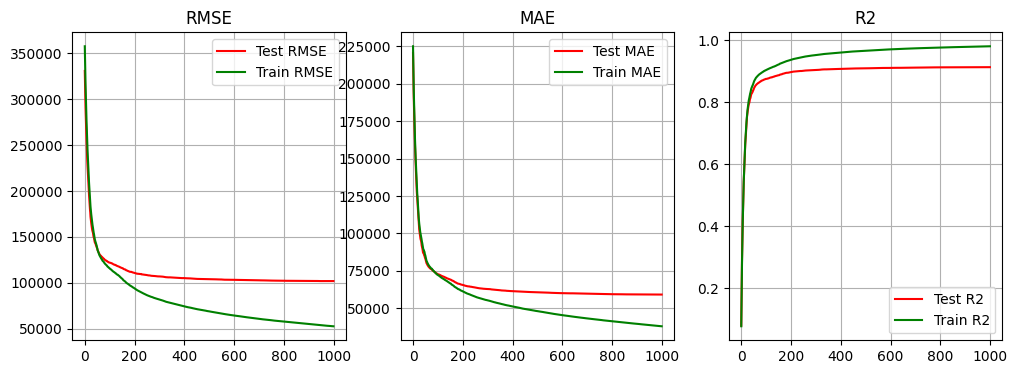

In [25]:
cat_res = cat_test.get_evals_result()

test_r2 = cat_res["validation"]["R2"]
test_rmse = cat_res["validation"]["RMSE"]
test_mae = cat_res["validation"]["MAE"]

train_r2 = cat_res["learn"]["R2"]
train_rmse = cat_res["learn"]["RMSE"]
train_mae = cat_res["learn"]["MAE"]

_, ax = plt.subplots(1, 3, figsize=(12,4))

sns.lineplot(data=test_rmse, label="Test RMSE", c="r", ax=ax[0])
sns.lineplot(data=train_rmse, label="Train RMSE", c="g", ax=ax[0])

sns.lineplot(data=test_mae, label="Test MAE", c="r", ax=ax[1])
sns.lineplot(data=train_mae, label="Train MAE", c="g", ax=ax[1])

sns.lineplot(data=test_r2, label="Test R2", c="r", ax=ax[2])
sns.lineplot(data=train_r2, label="Train R2", c="g", ax=ax[2])

ax[0].set_title("RMSE")
ax[1].set_title("MAE")
ax[2].set_title("R2")

ax[0].grid()
ax[1].grid()
ax[2].grid()

plt.show()

In [111]:
print_metrics(cat_test, X_test, y_test)

R-squared: 0.9127000145846864
RMSE: 101892.5265911306
MAE: 59148.117554830336


In [112]:
from optuna.integration import XGBoostPruningCallback


def xgb_objective(trial):
    dtrain = xgboost.DMatrix(X_train, label=y_train)

    param = {
        "max_depth": trial.suggest_int("max_depth", 4, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "gamma": trial.suggest_float("gamma", 0.0, 1.0),
        "subsample": trial.suggest_float("subsample", 0.01, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.01, 1.0),
        "reg_alpha": trial.suggest_float("reg_alpha", 0.0, 1.0),
        "reg_lambda": trial.suggest_float("reg_lambda", 0.01, 1.0),
        "random_state": 42,
    }

    pruning_callback = optuna.integration.XGBoostPruningCallback(trial, "test-rmse")

    history = xgboost.cv(
        param,
        dtrain,
        num_boost_round=250,
        folds=cv_object,
        callbacks=[pruning_callback],
        seed=42,
    )

    mean_rmse = history["test-rmse-mean"].values[-1]
    return mean_rmse

In [113]:
xgb_study = optuna.create_study(
    pruner=optuna.pruners.MedianPruner(), direction="minimize"
)
xgb_study.optimize(xgb_objective, n_trials=500, timeout=900)

print("Number of finished trials: {}".format(len(xgb_study.trials)))

print("Best trial:")
trial = xgb_study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

[I 2023-05-14 19:56:35,603] A new study created in memory with name: no-name-5fa4eda8-3ddc-4b7a-accc-c6e42af20eb5
[I 2023-05-14 19:56:46,534] Trial 0 finished with value: 127535.10137003385 and parameters: {'max_depth': 6, 'learning_rate': 0.2425187820059431, 'min_child_weight': 10, 'gamma': 0.22965061024988875, 'subsample': 0.8699558888799208, 'colsample_bytree': 0.5359917068188443, 'reg_alpha': 0.8697337973207794, 'reg_lambda': 0.13845962285063174}. Best is trial 0 with value: 127535.10137003385.
[I 2023-05-14 19:56:54,952] Trial 1 finished with value: 130215.42796924524 and parameters: {'max_depth': 9, 'learning_rate': 0.04730758154590343, 'min_child_weight': 7, 'gamma': 0.0566069925976852, 'subsample': 0.11002558932940028, 'colsample_bytree': 0.5263378846269781, 'reg_alpha': 0.6147301138793873, 'reg_lambda': 0.8140251899804566}. Best is trial 0 with value: 127535.10137003385.
[I 2023-05-14 19:57:07,617] Trial 2 finished with value: 129045.15129256353 and parameters: {'max_depth': 9

Number of finished trials: 500
Best trial:
  Value: 118625.46068531333
  Params: 
    max_depth: 4
    learning_rate: 0.17373171460635622
    min_child_weight: 1
    gamma: 0.9581214989272814
    subsample: 0.8487056173652843
    colsample_bytree: 0.7641071220935818
    reg_alpha: 0.3702272063167312
    reg_lambda: 0.3182279030353343


In [114]:
xgb_params = xgb_study.best_params
xgb_params

{'max_depth': 4,
 'learning_rate': 0.17373171460635622,
 'min_child_weight': 1,
 'gamma': 0.9581214989272814,
 'subsample': 0.8487056173652843,
 'colsample_bytree': 0.7641071220935818,
 'reg_alpha': 0.3702272063167312,
 'reg_lambda': 0.3182279030353343}

In [115]:
xgb = xgboost.XGBRegressor(n_estimators=250, seed=42, **xgb_params)
tuned_cv = print_metrics_cv(xgb, X_train, y_train, cv=cv_object)

Среднее время обучения: 0.7726433277130127
Train R-squared: 0.9608697906170022, test R-squared: 0.8954490084125426
Train RMSE: 73664.80590141946, test RMSE: 120611.47699382526
Train MAE: 51395.02645325252, test MAE: 68089.70387620192


In [116]:
xgb_params["objective"] = "reg:squarederror"
xgb_params["eval_metric"] = ["rmse", "mae"]
xgb_params["seed"] = 42
xgb_params

{'max_depth': 4,
 'learning_rate': 0.17373171460635622,
 'min_child_weight': 1,
 'gamma': 0.9581214989272814,
 'subsample': 0.8487056173652843,
 'colsample_bytree': 0.7641071220935818,
 'reg_alpha': 0.3702272063167312,
 'reg_lambda': 0.3182279030353343,
 'objective': 'reg:squarederror',
 'eval_metric': ['rmse', 'mae'],
 'seed': 42}

In [121]:
dtrain = xgboost.DMatrix(X_train, label=y_train)
dtest = xgboost.DMatrix(X_test, label=y_test)

xgb_res = {}

xgb_test = xgboost.train(
    params=xgb_params,
    dtrain=dtrain,
    num_boost_round=250,
    evals=[(dtrain, "train"), (dtest, "test")],
    evals_result=xgb_res,
    verbose_eval=10,
    early_stopping_rounds=15,
)

[0]	train-rmse:558154.12247	train-mae:448743.01667	test-rmse:532837.82691	test-mae:436667.03357
[10]	train-rmse:172631.54095	train-mae:100273.06816	test-rmse:168639.45469	test-mae:97492.15099
[20]	train-rmse:126824.75157	train-mae:78094.80685	test-rmse:131186.58585	test-mae:78006.64440
[30]	train-rmse:114988.81604	train-mae:72838.10899	test-rmse:122854.67464	test-mae:74361.96084
[40]	train-rmse:109092.84026	train-mae:69691.39391	test-rmse:119168.41268	test-mae:72147.91083
[50]	train-rmse:105042.45454	train-mae:67655.21433	test-rmse:116731.67160	test-mae:70668.84670
[60]	train-rmse:102234.29101	train-mae:66314.29798	test-rmse:115875.58945	test-mae:70153.36977
[70]	train-rmse:99115.12140	train-mae:64720.28243	test-rmse:114837.40121	test-mae:69335.33002
[80]	train-rmse:96154.00030	train-mae:63214.21132	test-rmse:113793.66775	test-mae:68550.04817
[90]	train-rmse:93980.92277	train-mae:62056.39212	test-rmse:113224.38170	test-mae:68095.58535
[100]	train-rmse:91901.93883	train-mae:61135.30088	

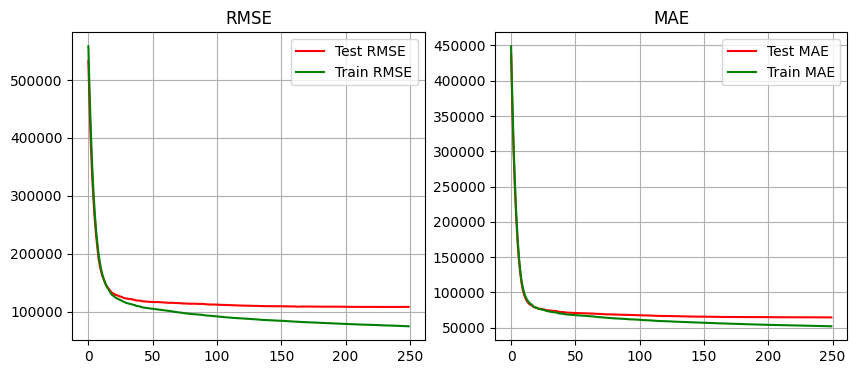

In [134]:
test_rmse = xgb_res["test"]["rmse"]
test_mae = xgb_res["test"]["mae"]

train_rmse = xgb_res["train"]["rmse"]
train_mae = xgb_res["train"]["mae"]

_, ax = plt.subplots(1, 2, figsize=(10,4))

sns.lineplot(data=test_rmse, label="Test RMSE", c="r", ax=ax[0])
sns.lineplot(data=train_rmse, label="Train RMSE", c="g", ax=ax[0])

sns.lineplot(data=test_mae, label="Test MAE", c="r", ax=ax[1])
sns.lineplot(data=train_mae, label="Train MAE", c="g", ax=ax[1])

ax[0].set_title("RMSE")
ax[1].set_title("MAE")

ax[0].grid()
ax[1].grid()

plt.show()

In [135]:
print_metrics(xgb_test, X_test=dtest, y_test=dtest.get_label())

R-squared: 0.9012382920195569
RMSE: 108375.1171875
MAE: 64464.83203125


In [137]:
dtrain = lightgbm.Dataset(X_train, label=y_train)
dtest = lightgbm.Dataset(X_test, label=y_test)

In [138]:
lgbm_params = {
    "objective": "rmse",
    "metric": ["l1", "rmse"],
    "random_state": 42,
    "verbosity": -1,
}
lgbm_study = optuna.create_study()

tuner = optuna.integration.LightGBMTunerCV(
    lgbm_params,
    dtrain,
    num_boost_round=1000,
    folds=cv_object,
    seed=42,
    study=lgbm_study,
)

tuner.run()

[I 2023-05-14 20:31:37,083] A new study created in memory with name: no-name-734e6c07-da1a-4f19-9fc7-945b5d6aca56
bagging, val_score: 119520.942887: 100%|##########| 10/10 [00:55<00:00,  5.54s/it]
feature_fraction_stage2, val_score: 119520.942887:  33%|###3      | 1/3 [00:06<00:12,  6.15s/it][I 2023-05-14 20:38:24,663] Trial 37 finished with value: 121117.61709262799 and parameters: {'feature_fraction': 0.48000000000000004}. Best is trial 37 with value: 121117.61709262799.
feature_fraction_stage2, val_score: 117888.090390:  67%|######6   | 2/3 [00:12<00:06,  6.26s/it][I 2023-05-14 20:38:30,994] Trial 38 finished with value: 117888.09039012858 and parameters: {'feature_fraction': 0.44800000000000006}. Best is trial 38 with value: 117888.09039012858.
feature_fraction_stage2, val_score: 117888.090390: 100%|##########| 3/3 [00:18<00:00,  6.06s/it][I 2023-05-14 20:38:36,829] Trial 39 finished with value: 119520.94288679794 and parameters: {'feature_fraction': 0.41600000000000004}. Best is t

In [139]:
lgbm_params = tuner.best_params
lgbm_params

{'objective': 'rmse',
 'metric': ['l1', 'rmse'],
 'random_state': 42,
 'verbosity': -1,
 'feature_pre_filter': False,
 'lambda_l1': 0.0001697207345615752,
 'lambda_l2': 2.523975829237563e-06,
 'num_leaves': 14,
 'feature_fraction': 0.44800000000000006,
 'bagging_fraction': 0.9530241445357162,
 'bagging_freq': 3,
 'min_child_samples': 10}

In [158]:
evals = {}

lgbm_test = lightgbm.train(
    params=lgbm_params,
    train_set=dtrain,
    num_boost_round=3000,
    valid_sets=[dtrain, dtest],
    callbacks = [lightgbm.record_evaluation(evals)]
)

In [159]:
print_metrics(lgbm_test, X_test, y_test)

R-squared: 0.9138429243404
RMSE: 101223.3533704254
MAE: 59764.22298299789


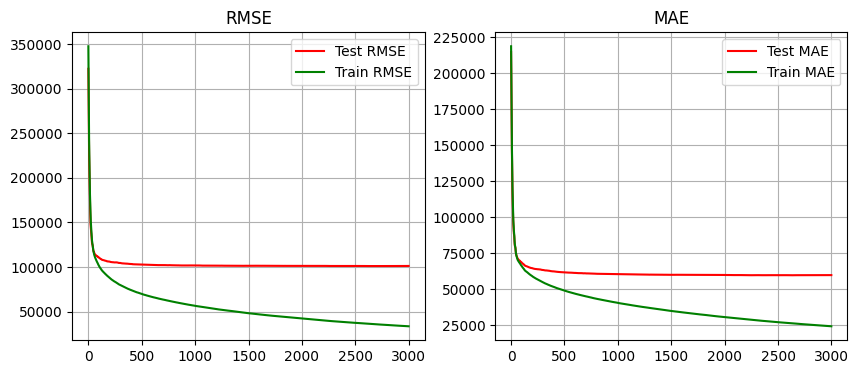

In [160]:
test_rmse = evals["valid_1"]["rmse"]
test_mae = evals["valid_1"]["l1"]

train_rmse = evals["training"]["rmse"]
train_mae = evals["training"]["l1"]

_, ax = plt.subplots(1, 2, figsize=(10,4))

sns.lineplot(data=test_rmse, label="Test RMSE", c="r", ax=ax[0])
sns.lineplot(data=train_rmse, label="Train RMSE", c="g", ax=ax[0])

sns.lineplot(data=test_mae, label="Test MAE", c="r", ax=ax[1])
sns.lineplot(data=train_mae, label="Train MAE", c="g", ax=ax[1])

ax[0].set_title("RMSE")
ax[1].set_title("MAE")

ax[0].grid()
ax[1].grid()

plt.show()

## Нейронные сети

In [31]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset, random_split

In [188]:
def training_loop(n_epochs, optimizer, model, loss_fn, train_loader):
    train_losses = []
    for epoch in range(1, n_epochs + 1):
        loss_train = 0.0
        for x, y in train_loader:
            x = x.to(device=device)
            y = y.to(device=device)
            outputs = model(x)
            loss = loss_fn(outputs, y.unsqueeze(1))

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            loss_train += loss.item()

        train_loss = loss_train / len(train_loader)
        train_losses.append(train_loss)

        print("Epoch {}, Training loss {}".format(epoch, train_loss))

    return train_losses


def validate(model, train_loader, val_loader):
    for name, loader in [("train", train_loader), ("val", val_loader)]:
        rmse = 0
        mae = 0
        r2 = 0
        with torch.no_grad():
            for x, y in loader:
                x = x.to(device)
                y = y.to(device).cpu().numpy()
                outputs = model(x).cpu().numpy()
                rmse += np.sqrt(mean_squared_error(y, outputs))
                mae += mean_absolute_error(y, outputs)
                r2 += r2_score(y, outputs)
        rmse = rmse / len(loader)
        mae = mae / len(loader)
        r2 = r2 / len(loader)
        print("RMSE {}: {:.4f}".format(name, rmse))
        print("MAE {}: {:.4f}".format(name, mae))
        print("R-squared {}: {:.4f}".format(name, r2))

In [189]:
scaler = StandardScaler().fit(X_train)

X_train_tensor = torch.from_numpy(scaler.transform(X_train)).to(torch.float32)
X_val_tensor = torch.from_numpy(scaler.transform(X_test)).to(torch.float32)

y_train_tensor = torch.from_numpy(y_train.values).to(torch.float32)
y_val_tensor = torch.from_numpy(y_test.values).to(torch.float32)

In [190]:
train_data = TensorDataset(X_train_tensor, y_train_tensor)
val_data = TensorDataset(X_val_tensor, y_val_tensor)

In [191]:
train_loader = DataLoader(train_data, batch_size=16, shuffle=False)
val_loader = DataLoader(val_data, batch_size=16, shuffle=False)

In [192]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


In [193]:
model = nn.Sequential(
    nn.Linear(18, 64),
    nn.ReLU(),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 8),
    nn.ReLU(),
    nn.Linear(8, 1),
).to(device)

loss_fn = nn.L1Loss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [194]:
train_losses = training_loop(50, optimizer, model, loss_fn, train_loader)

Epoch 1, Training loss 154465.88184587477
Epoch 2, Training loss 107909.19131591119
Epoch 3, Training loss 105542.15937391593
Epoch 4, Training loss 104312.56016564523
Epoch 5, Training loss 103448.77505275786
Epoch 6, Training loss 102700.1436152145
Epoch 7, Training loss 102102.27113747399
Epoch 8, Training loss 101784.37690072849
Epoch 9, Training loss 101445.21039908071
Epoch 10, Training loss 101048.1333202041
Epoch 11, Training loss 100828.79525612858
Epoch 12, Training loss 98568.46118502833
Epoch 13, Training loss 92344.05233507747
Epoch 14, Training loss 87623.73970679638
Epoch 15, Training loss 84790.61733565564
Epoch 16, Training loss 83043.25419714095
Epoch 17, Training loss 81613.36866724966
Epoch 18, Training loss 80559.1044009453
Epoch 19, Training loss 79428.25983608927
Epoch 20, Training loss 78439.36183221554
Epoch 21, Training loss 77443.58969740113
Epoch 22, Training loss 76420.7169630984
Epoch 23, Training loss 75617.85859266593
Epoch 24, Training loss 74636.202893

In [195]:
validate(model, train_loader, val_loader)

RMSE train: 101138.1435
MAE train: 66062.3567
R-squared train: 0.8595
RMSE val: 100601.6904
MAE val: 66402.5854
R-squared val: 0.8555


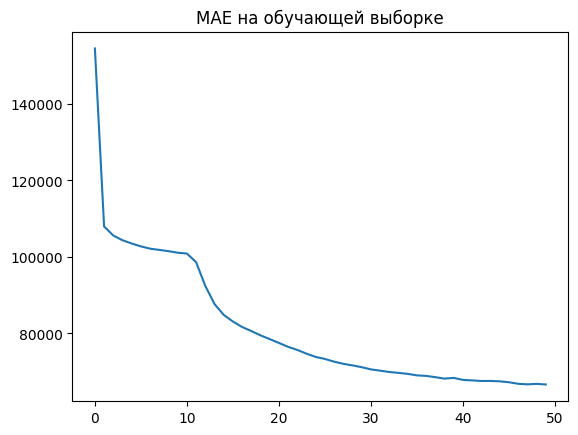

In [200]:
sns.lineplot(train_losses)
plt.title("MAE на обучающей выборке")
plt.show()

# Выводы

В целом, наилучшие результаты показали алгоритмы градиентого бустинга, а именно LightGBM и CatBoost. Однако нейросеть показала себя лучше в минимизации RMSE. Скорее всего, поработав с данными, можно будет добиться лучших показателей метрик, однако в данной работе фокус был на сравнении моделей и оптимизации гиперпараметров